<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_1_0502_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents of the Notebook

- Part1: Exploratory Data Analysis(EDA):
1. Analysis of the features.

2. Finding any relations or trends considering multiple features.

- Part2: Feature Engineering and Data Cleaning:
1. Adding any few features.

2. Removing redundant features.

3. Converting features into suitable form for modeling.

- Part3: Predictive Modeling
1. Running Basic Algorithms.

2. Cross Validation.

3. Ensembling.

4. Important Features Extraction.

# Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic_train.csv")
data.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- Age, Cabin, Embarked -> Null 값 있음

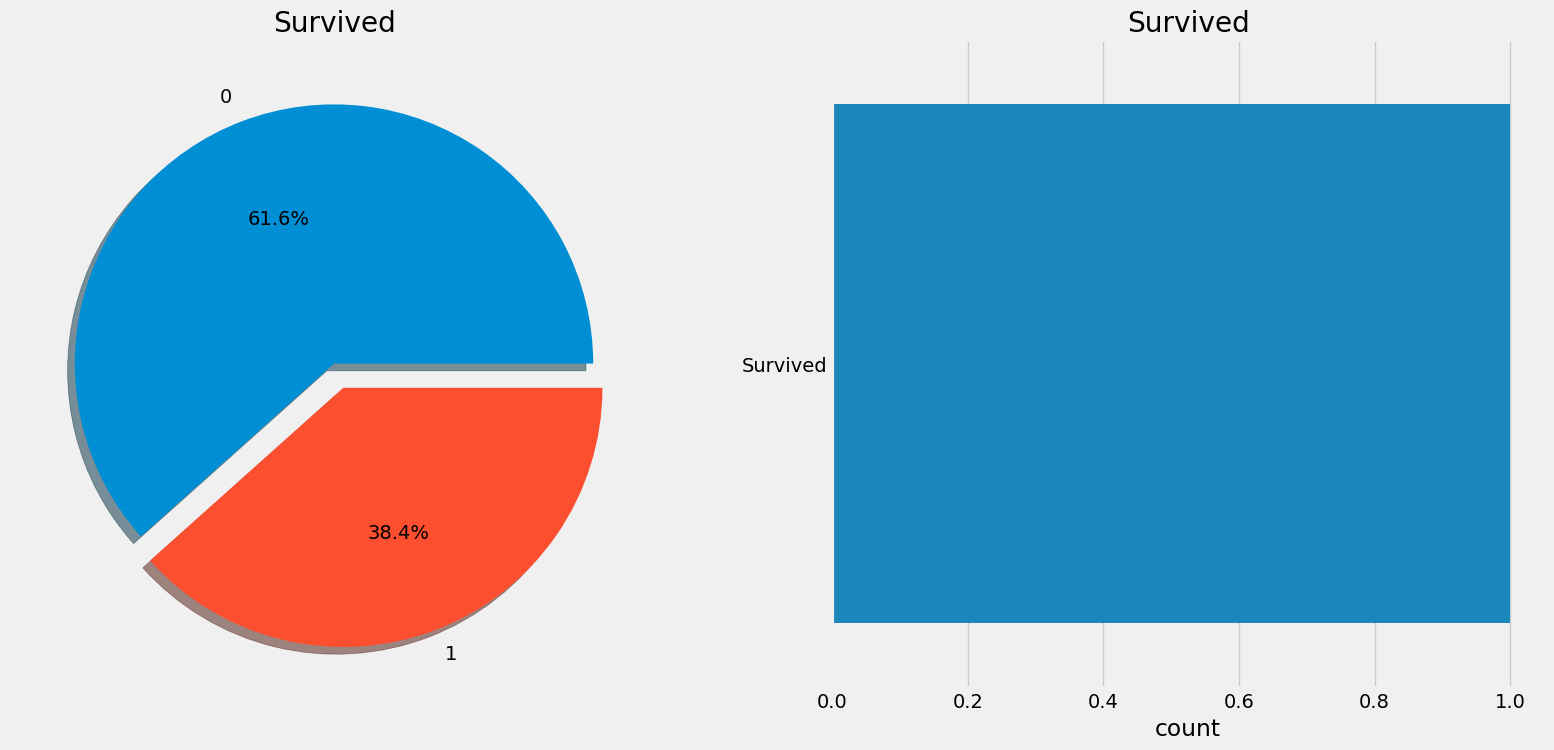

In [5]:
# How many Survived

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 많은 탑승객이 생존하지 못함
- 891명 중 약 350명 생존 (38.4%)
- 어떤 카테고리 탑승객이 생존했는지 dig down
- survival rate을 다양한 features로 확인

# Types Of Features

## Categorical Features

- categorical variables는 두개 이상의 카테고리에서 각각의 features가 카테고리화 되는 것
- Nominal Variables 라고도 불림
- Categorical Features in the dataset: Sex,Embarked.

## Ordinal Features

- Categorical variables와 비슷하지만  value 사이에 relative ordering or sorting 가 다름
- Ordinal Features in the dataset: PClass

## Continous Feature

- features가 두 지점 사이 특정 열의 최솟값이나 최댓값 사이의 값을 가질 수 있는 경우 특성은 연속적이라고 함
- Continous Features in the dataset: Age

# Analysing The Features
## Sex--> Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

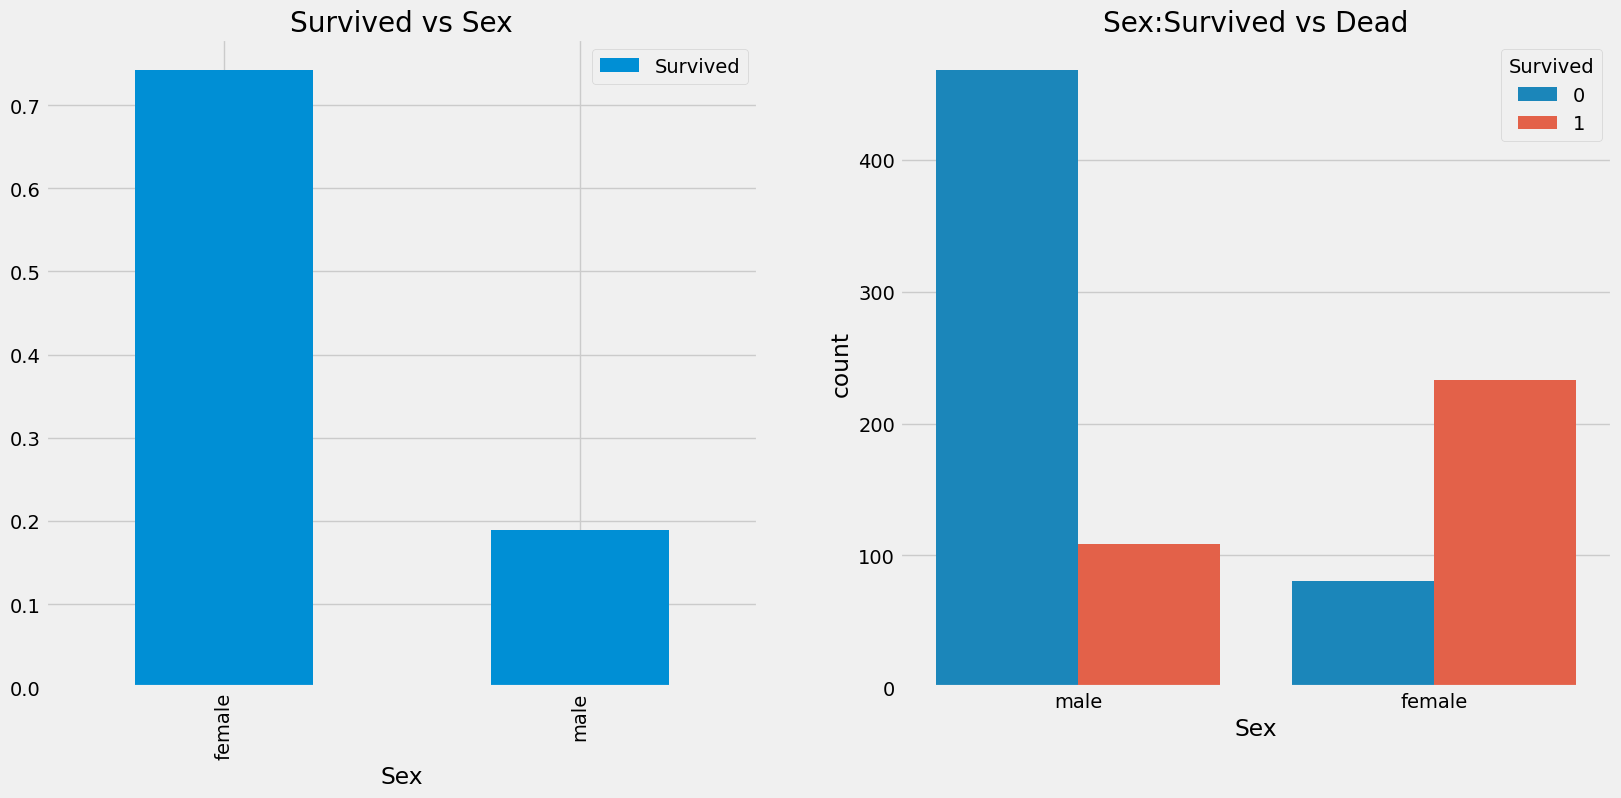

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 남성 탑승객이 여성 탑승객보다 많지만 생존자는 여성이 2배 많음
- 여성은 생존율 75%, 남성은 19-19%

## Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


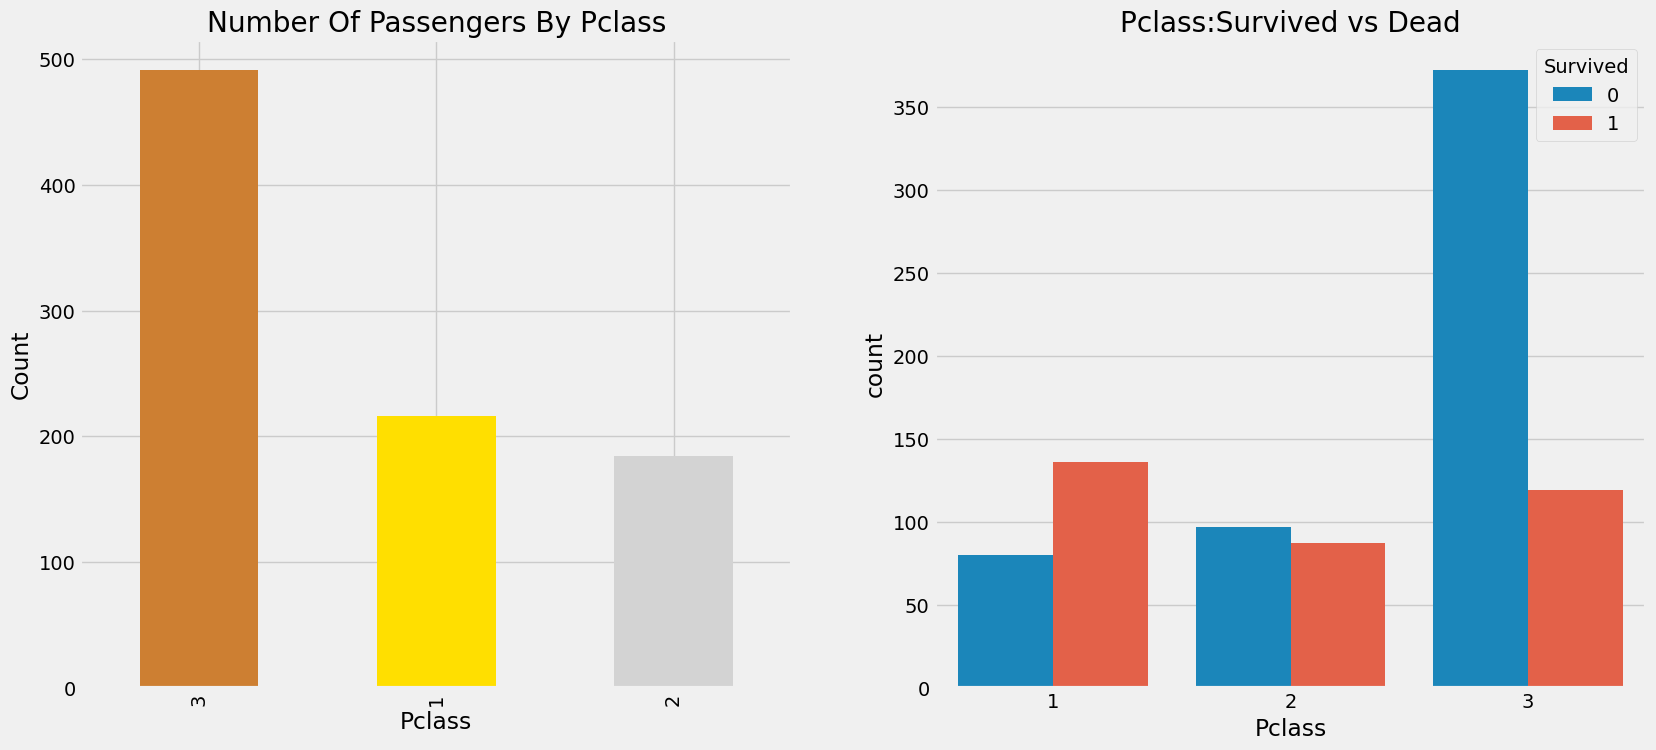

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 1등급 승객이 많이 구조됨
- 3등급 승객 수가 더 많았지만 생존율은 25%로 낮았음
- 1등금 생존율 63%, 2등급 생존율 48%

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

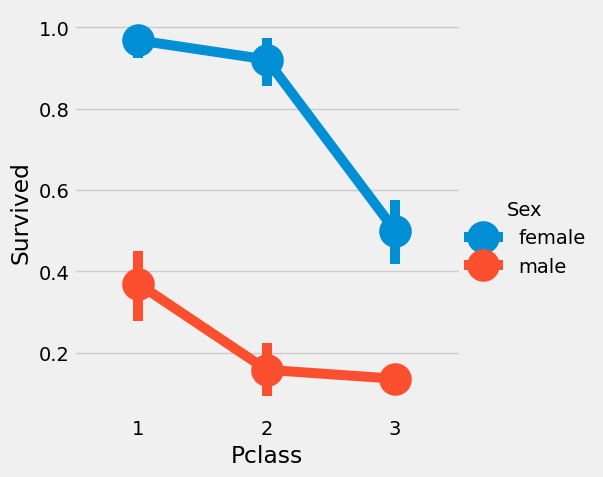

In [15]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

In [16]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


- Factorplot 이용 -> 카테고리 분류 쉽기 때문
 - CrossTab, FactorPlot에 따르면 여성 1등급 승객 생존율은 95-96%
 - 1등급 남성 승객은 생존율 낮음


---

## Age--> Continous Feature


In [17]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


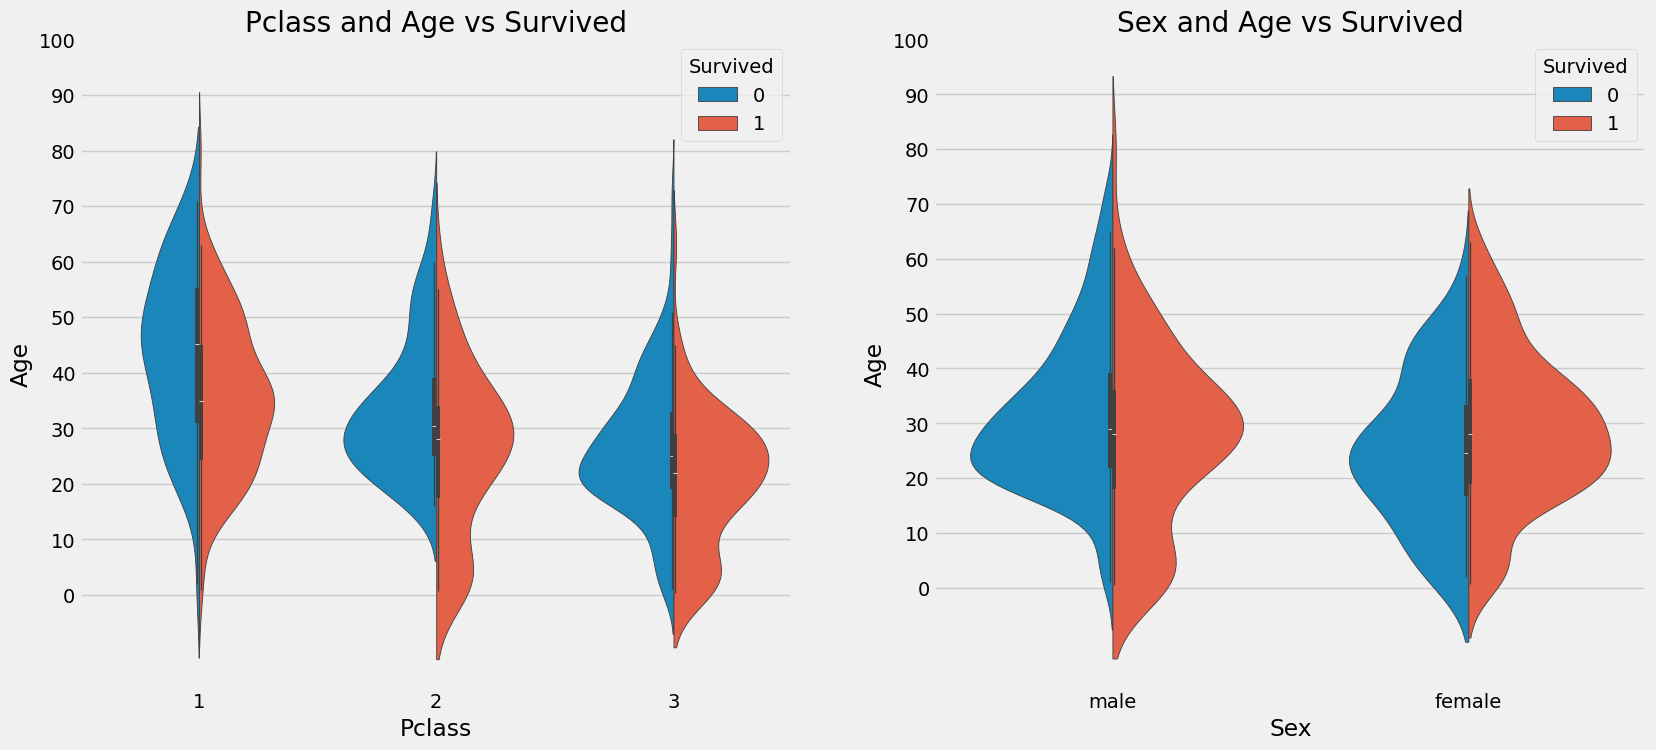

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. 등급이 높아질수록 아동 수 증가, 10세 미만 승객 생존율은 등급과 관계없이 양호
2. 1등급 20~50세 승객의 생존율은 높으며 여성의 경우 더 높음
3. 남성의 경우 연령이 증가할 수 생존율이 감소

---
- Age 피처에서 177개의 NULL 값이 있음, 이 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있음
- 승객이 어떤 연령대에 있는지 확인하는 방법 -> MR, MRS할당

- ''What's In A Name??''---> Feature :p

In [19]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [22]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [23]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [24]:
data.Age.isnull().any() #So no null values left finally

np.False_

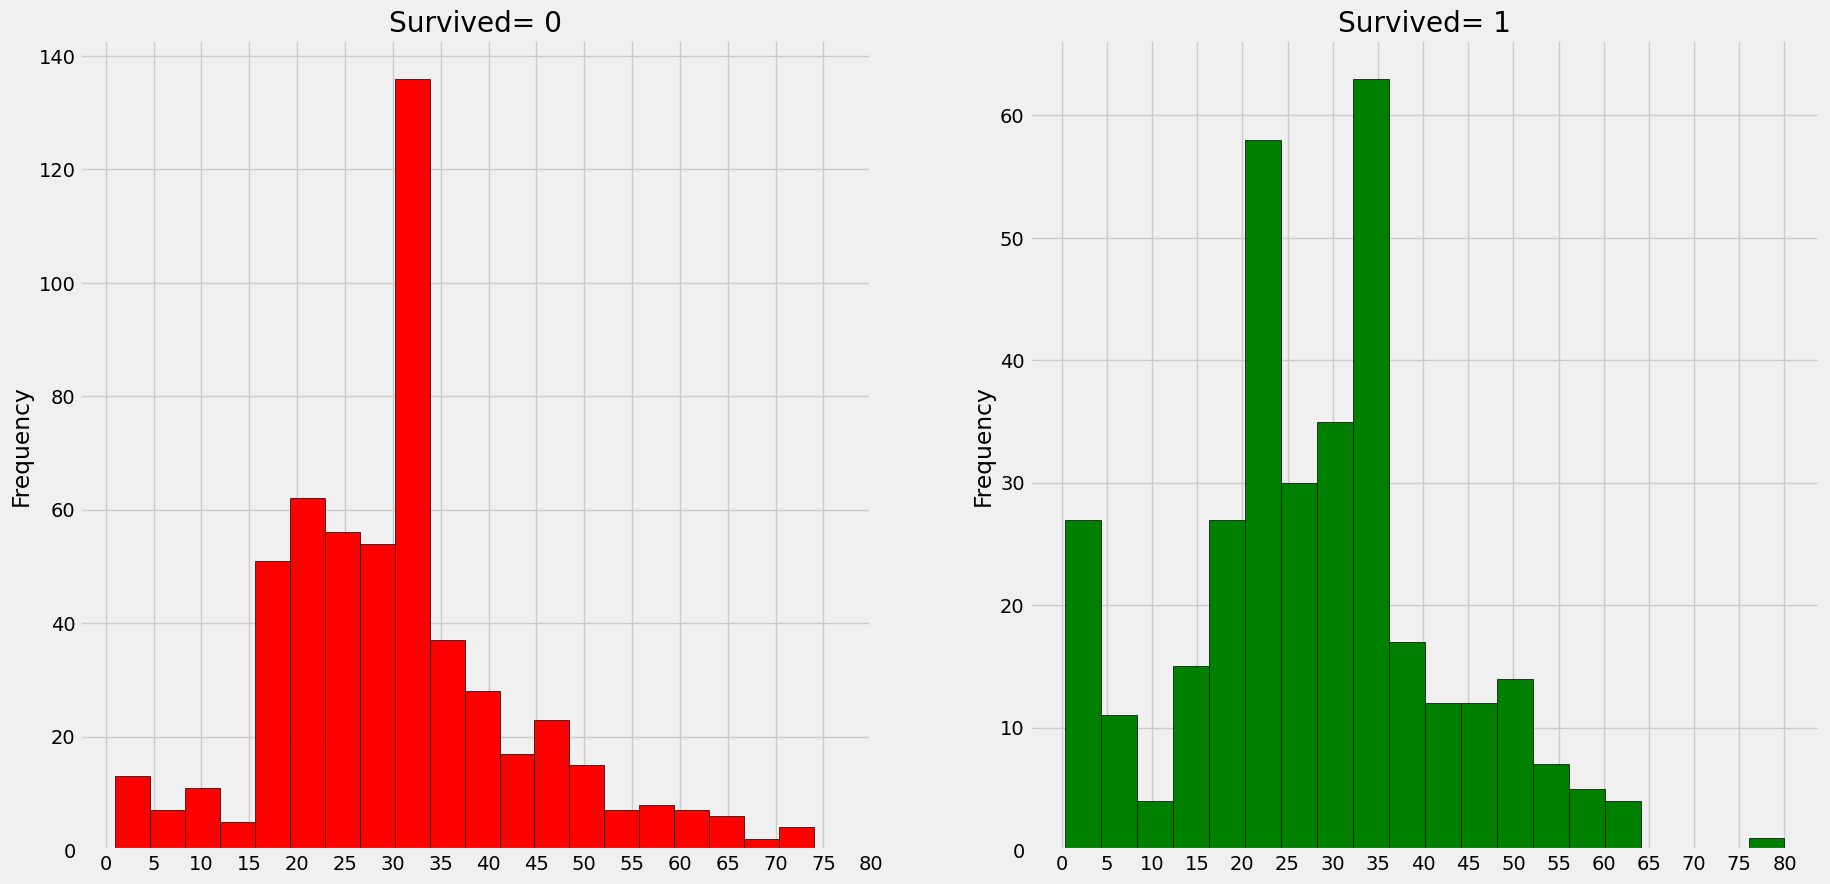

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- 5세 미만 유아가 다수 구도
- 가장 나이 많은 승객 구조
- 사망자는 30-40대가 많음

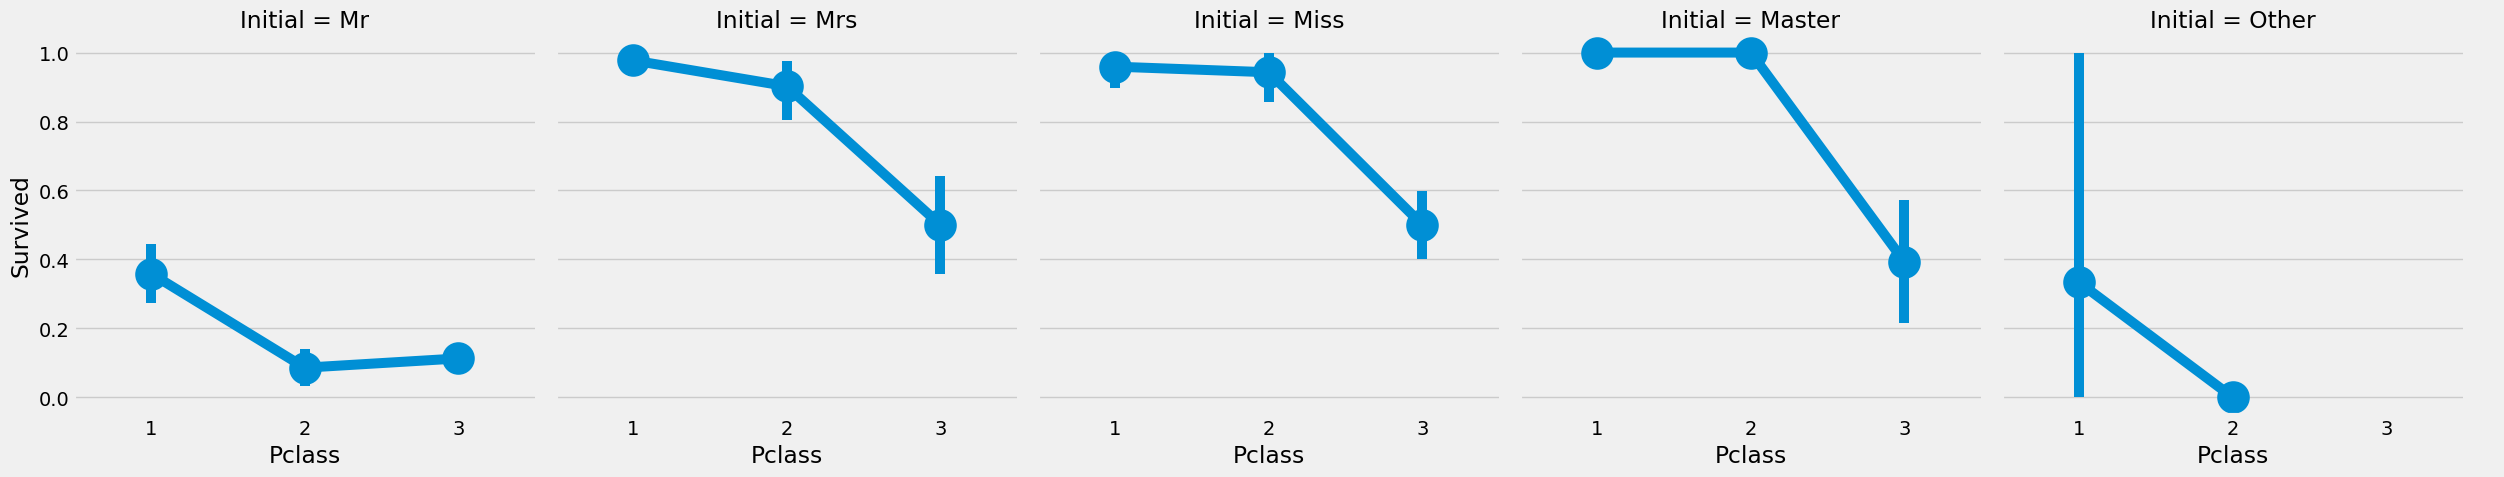

In [32]:
sns.catplot(x='Pclass',y='Survived',col='Initial', data= data, kind='point')
plt.show()

- 여성과 아동은 계층에 관계없이 우선 구조

---
## Embarked--> Categorical Value


In [33]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')


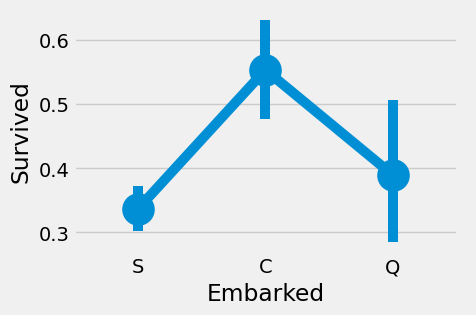

In [35]:
sns.catplot(x="Embarked",y="Survived", data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C의 생존 가능성은 0.55 정도로 가장 높고, S의 생존 가능성은 가장 낮음

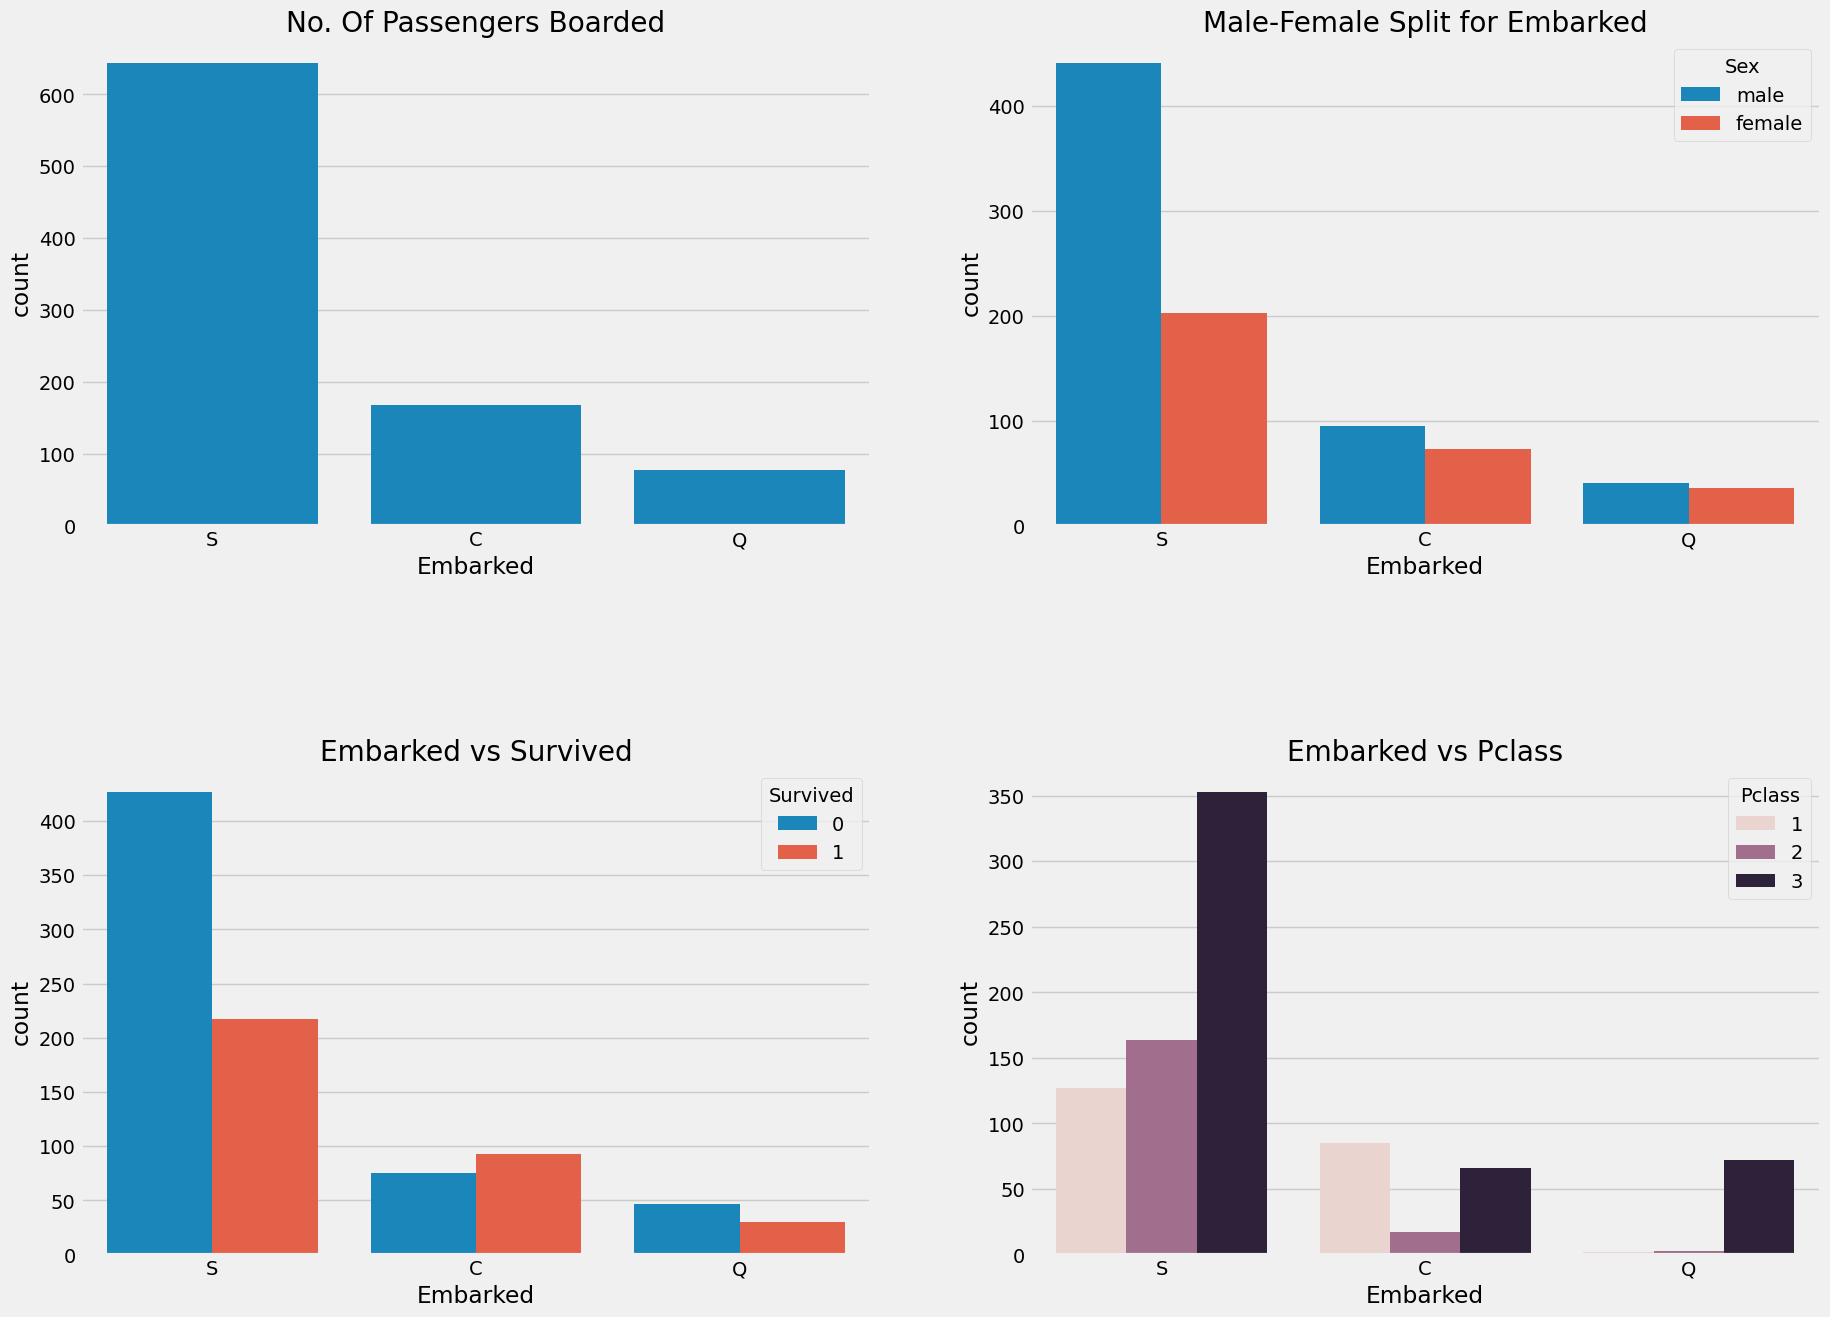

In [36]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S에서 최대 승객이 탑승. 대부분은 Pclass3 승객
- C에서 탑승한 승객들은 상당수가 생존했기 때문에 운이 좋았던 것으로 보임. (아마도 Pclass1과 Pclass2 승객이 모두 구조되었기 때문)
- S에서 탑승한 승객들은 부유층 대부분이 탑승한 항구를 향하고 있음 하지만 여기서도 생존 가능성은 낮음 (Pclass3 승객 중 약 81%가 생존하지 못했기 때문.)
- Q 항구 승객의 거의 95%가 Pclass3 승객

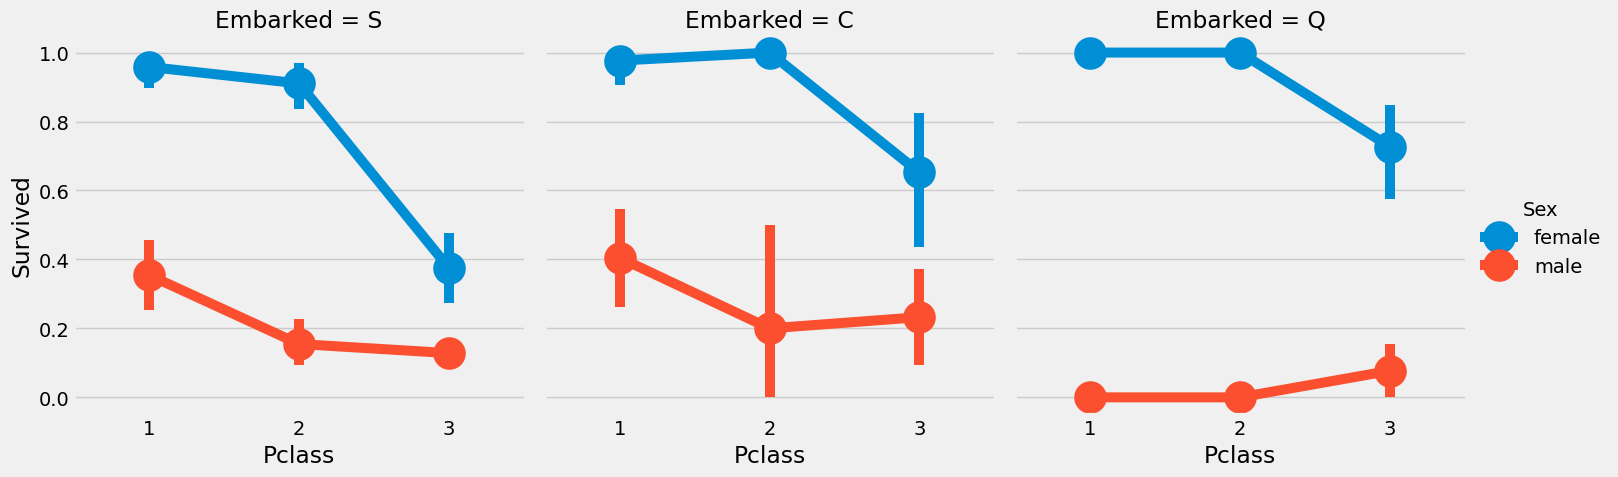

In [37]:
sns.catplot(x="Pclass",y="Survived", hue='Sex', col='Embarked', data=data, kind='point')
plt.show()


- Pclass1과 Pclass2 여성의 생존 확률은 Pclass와 관계없이 거의 1
- S항은 Pclass3 승객 남녀 모두 생존율이 매우 낮움
- Q항은 거의 모든 승객이 Pclass3 승객

---

## Filling Embarked NaN
- 최대 승객이 S에서 탑승했으므로 NaN을 S로 대

In [38]:
data['Embarked'].fillna('S',inplace=True)

In [39]:
data.Embarked.isnull().any() # Finally No NaN values

np.False_

## SibSip-->Discrete Feature
- 혼자인지 가족과 함께 있는지
- 형제자매, 배우

In [40]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


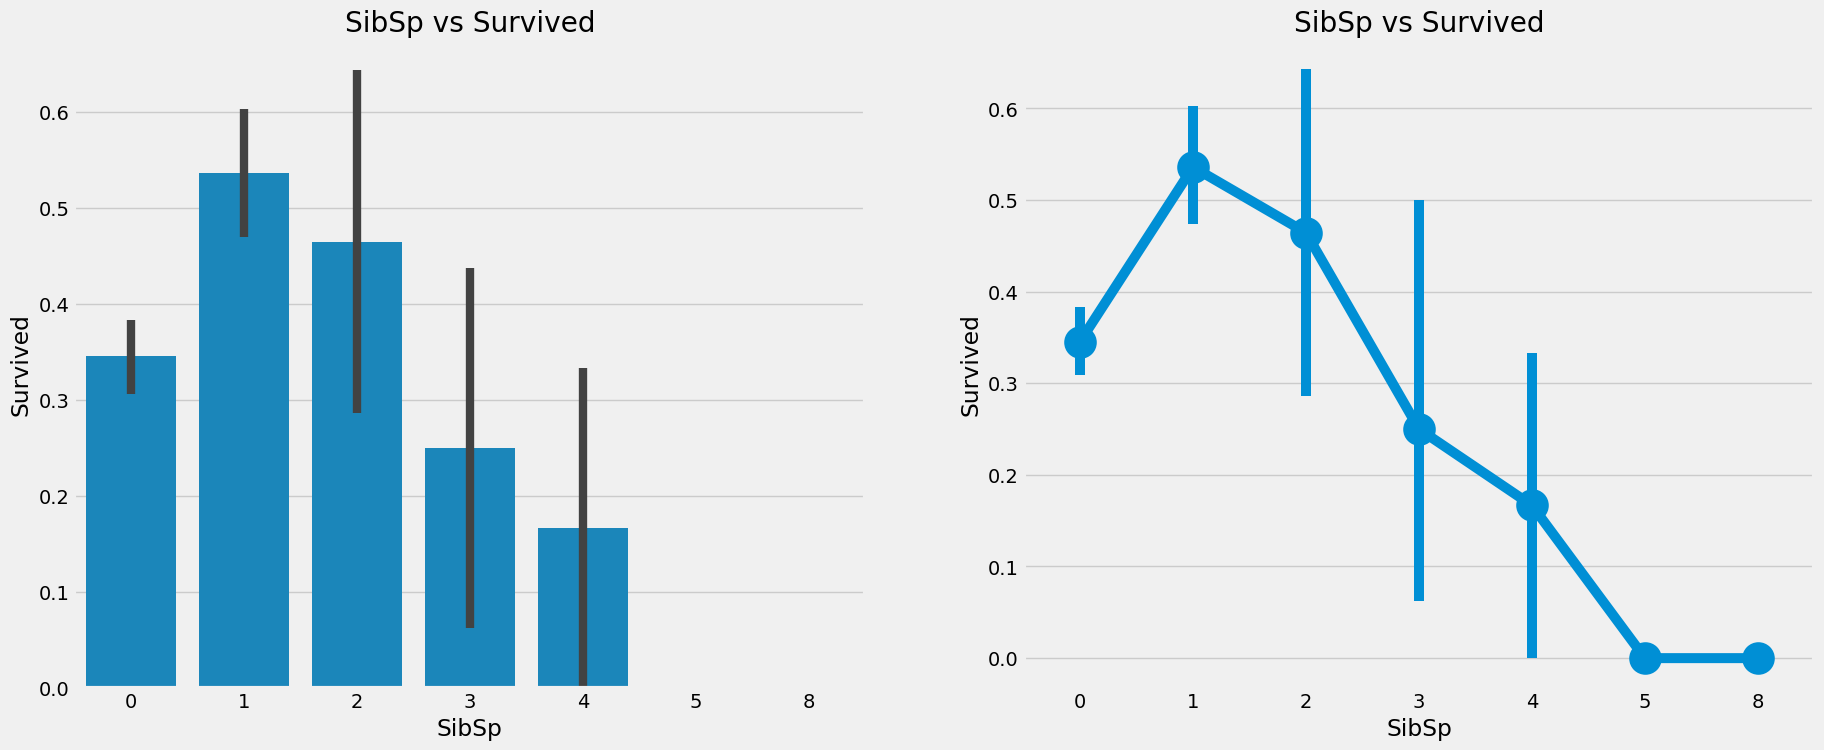

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [42]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 형제자매 없이 혼자 탑승한 승객의 생존율이 34.5%임
- 형제자매 수가 증가하면 그래프는 감소
- 탑승한 가족이 있다면 나 자신을 구하기보다는 가족을 먼저 구하려고 함
- 형제자매 수가 3 이상인 사람은 모두 Pclass3에 속

## Parch

In [43]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


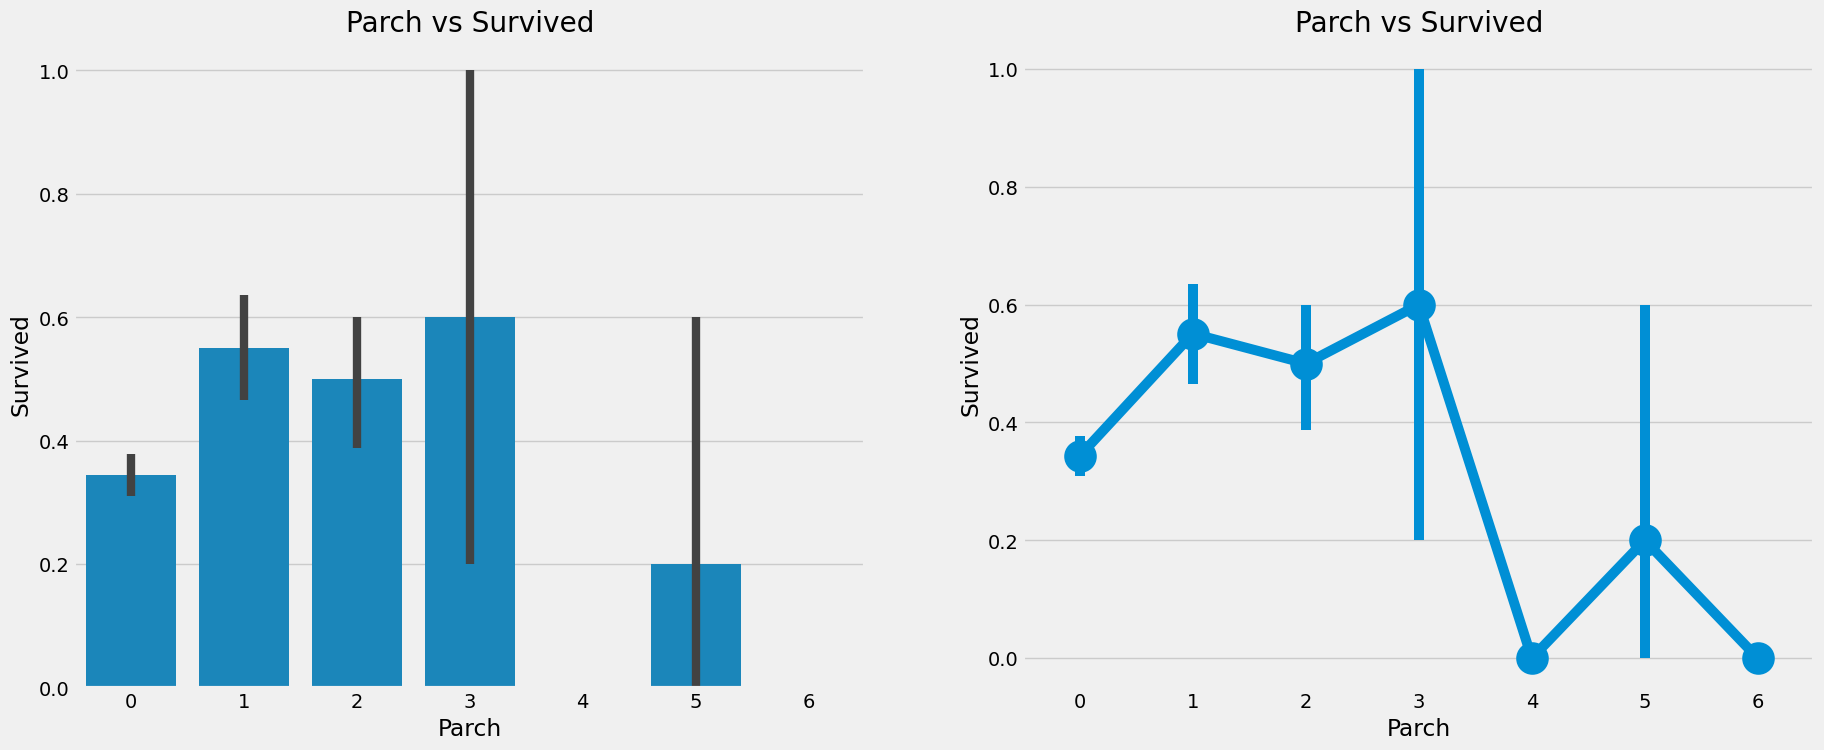

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 부모와 함께 탑승한 승객의 생존 확률이 더 높았음
- 배에 부모가 1~3명 있는 경우 생존 확률이 높았음
- 부모가 4명 이상인 경우 생존 확률이 감소

---
## Fare--> Continous Feature



In [45]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


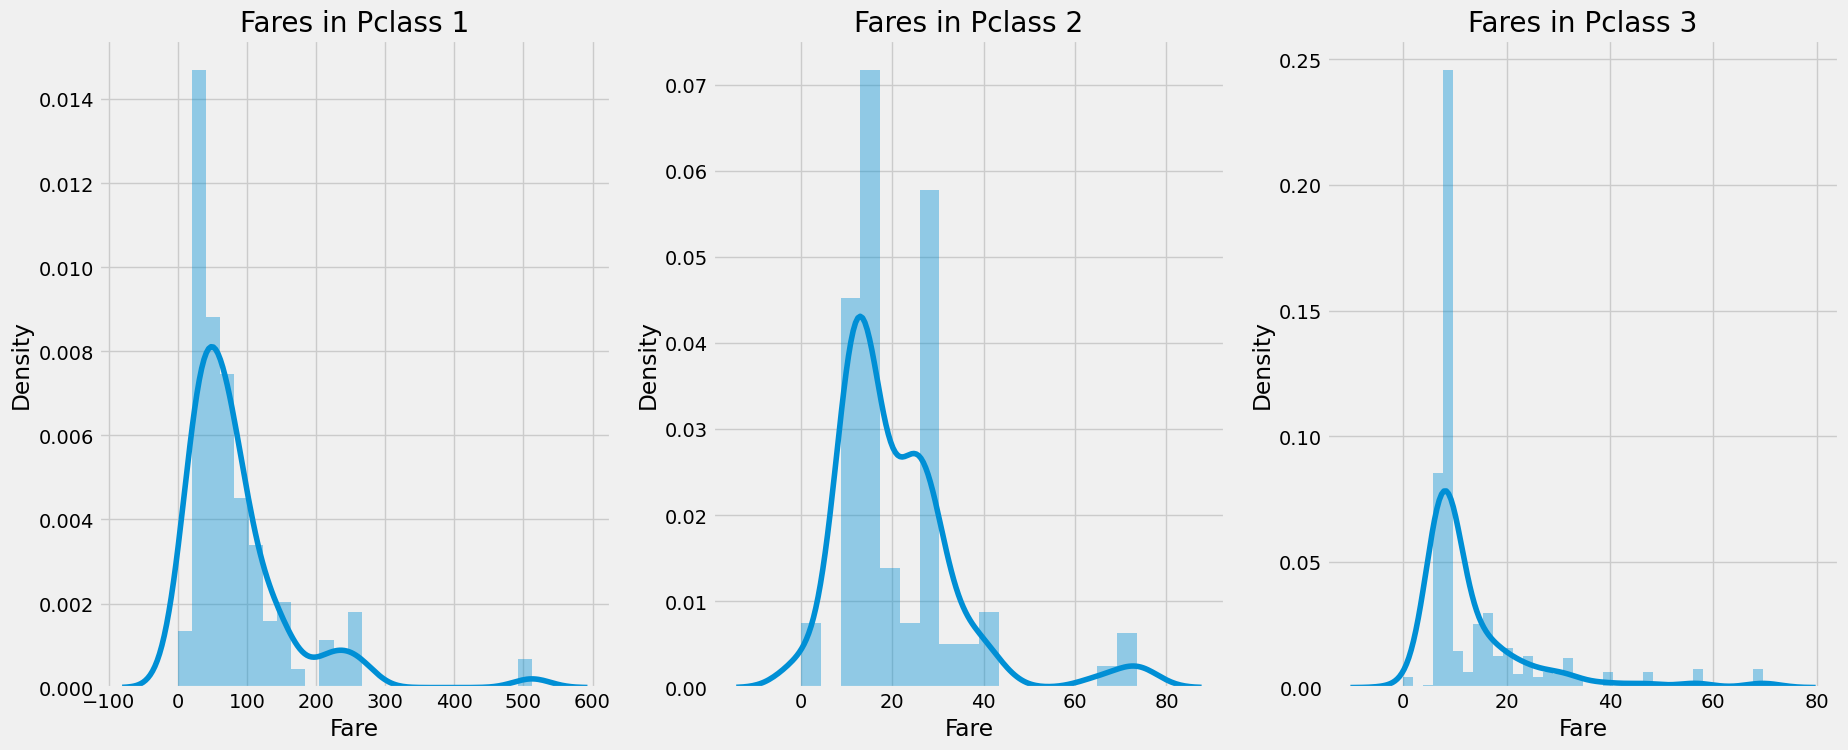

In [46]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


- 연속적이므로, 비닝을 사용하여 이산적인 값으로 변환 가능

---

- 성별: 여성의 생존 확률은 남성보다 높음
- Pclass: 1등석 승객이 생존 확률이 더 높음. 3등석 생존율은 매우 낮음. 여성의 경우 1등석 생존 확률은 거의 1이며, 2등석 생존 확률도 높음
- 연령: 5~10세 미만의 어린이는 생존 확률이 높음. 15세에서 35세 사이의 승객이 많이 사망함
- 항구:1등석 승객 대부분이 S에서 탑승했음에도 불구하고 C등급의 생존 확률이 더 높음. Q등급 승객은 모두 3등석
- Parch+SibSp: 형제자매 1~2명, 배우자 또는 부모 1~3명이 탑승하는 것이 혼자 탑승하거나 대가족과 함께 여행하는 것보다 생존 확률이 더 높

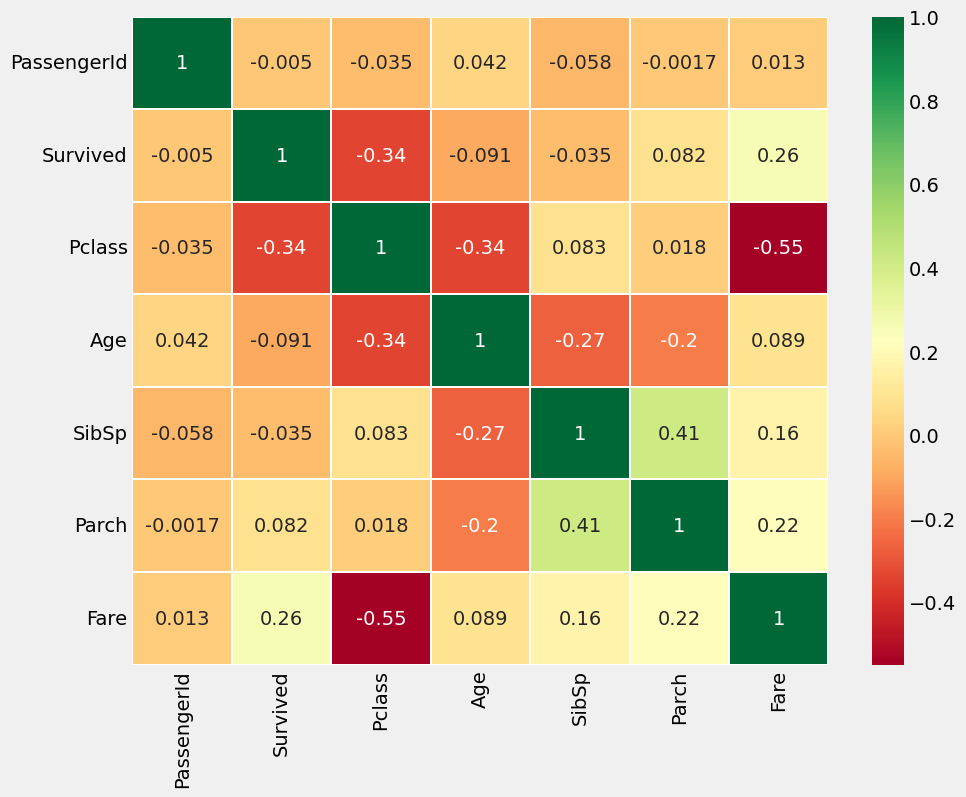

In [47]:
numeric_data = data.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- 숫자형 피처만 비교
- 양의 상관관계, 음의 상관관계
- MultiColinearity
- 특성 간 상관관계가 크지 않음 -> 모든 특성을 사용하여 학습을 계속 진행할 수 있음


---
# Part2: Feature Engineering and Data Cleaning, Now what is Feature Engineering?

## Age_Band
- 연속적 특성이므로 머신 러닝 모델에서 문제 발생
- 연속형 값을 비닝이나 정규화를 통해 범주형 값으로 변환
- 빈의 크기 16으로 그룹

In [48]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [49]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


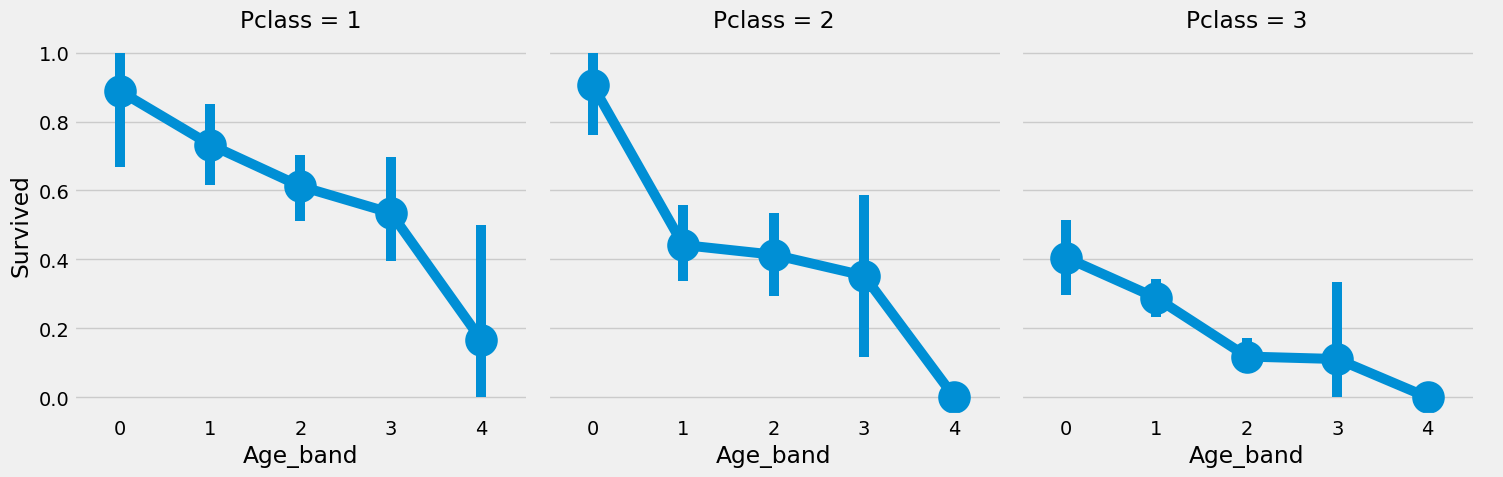

In [50]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()

## Family_Size and Alone
- "Family_size" "Alone" 으로 새로운 피터 생성 - Parch and SibSp의 합산


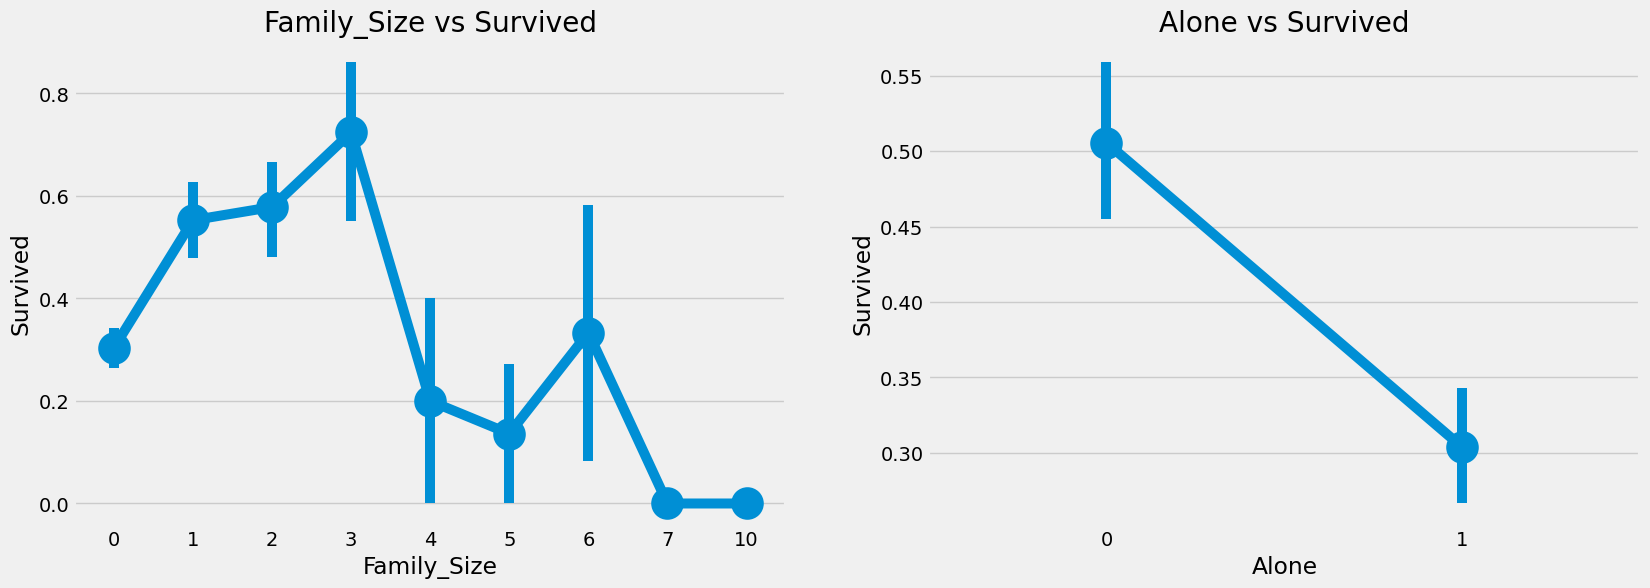

In [52]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- Family_Size=0은 승객이 혼자라는 것
- 생존 가능성 매우 낮음
- 가족 규모가 4명 이상이면 생존 가능성 감

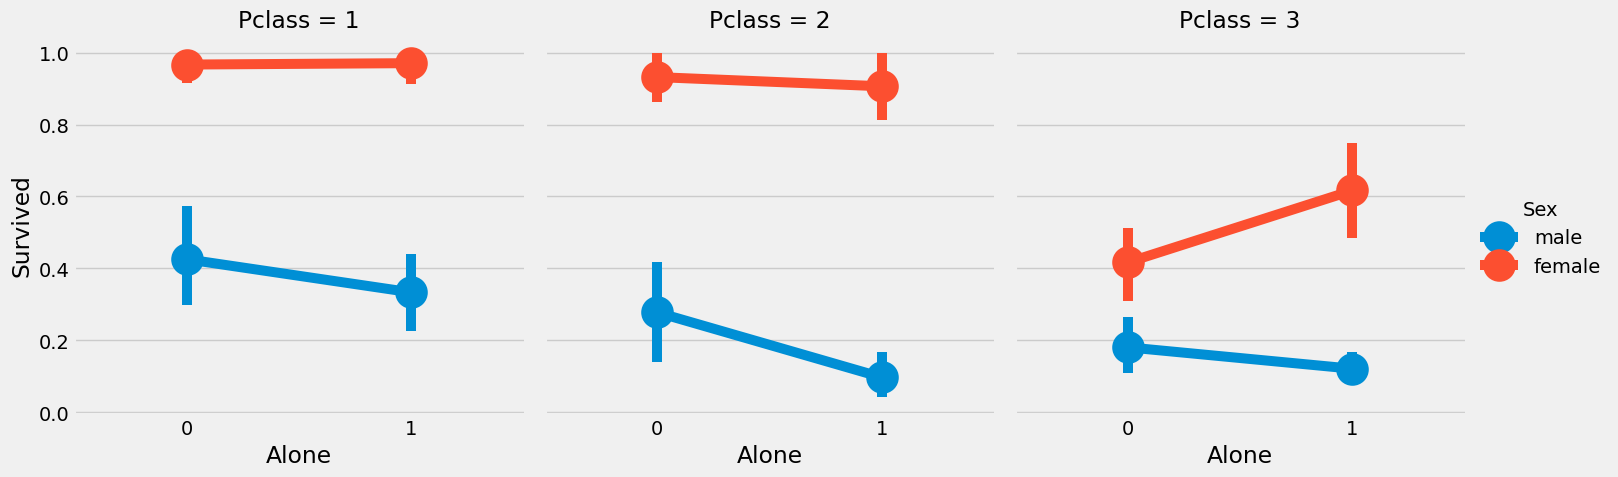

In [53]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass', kind='point')
plt.show()

- 3등석의 경우 가족이 있는 여성보다 혼자 있는 여성의 생존율 낮음


---

## Fare_Range
- 요금도 연속형 변수이므로 순서형 값으로 변환해야함 -> pandas.qcut 이용
- qcut는 구간의 개수의 따라 값을 분할하거나 정


In [55]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- fare_range 가 증가할수록 생존확율이 노ㅗㅍ음
- singleton values로 변

In [56]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

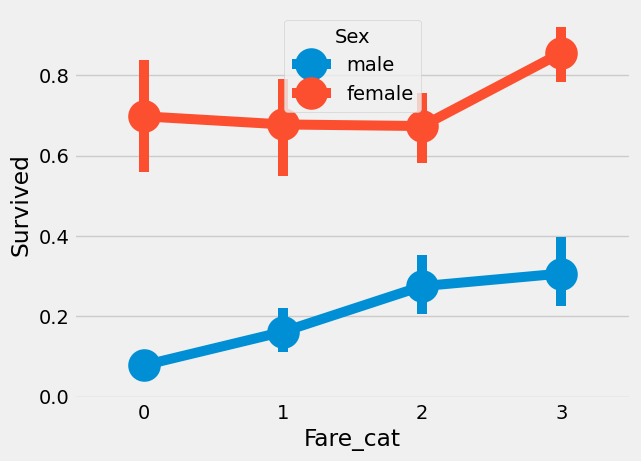

In [57]:
sns.pointplot(x='Fare_cat',y='Survived',data=data,hue='Sex')
plt.show()

## Converting String Values into Numeric

In [58]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

- 불필요한 피터 삭제
- Age--> We have the Age_band feature, so no need of this.

- Ticket--> It is any random string that cannot be categorised.

- Fare--> We have the Fare_cat feature, so unneeded

- Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

- Fare_Range--> We have the fare_cat feature.

- PassengerId--> Cannot be categorised.

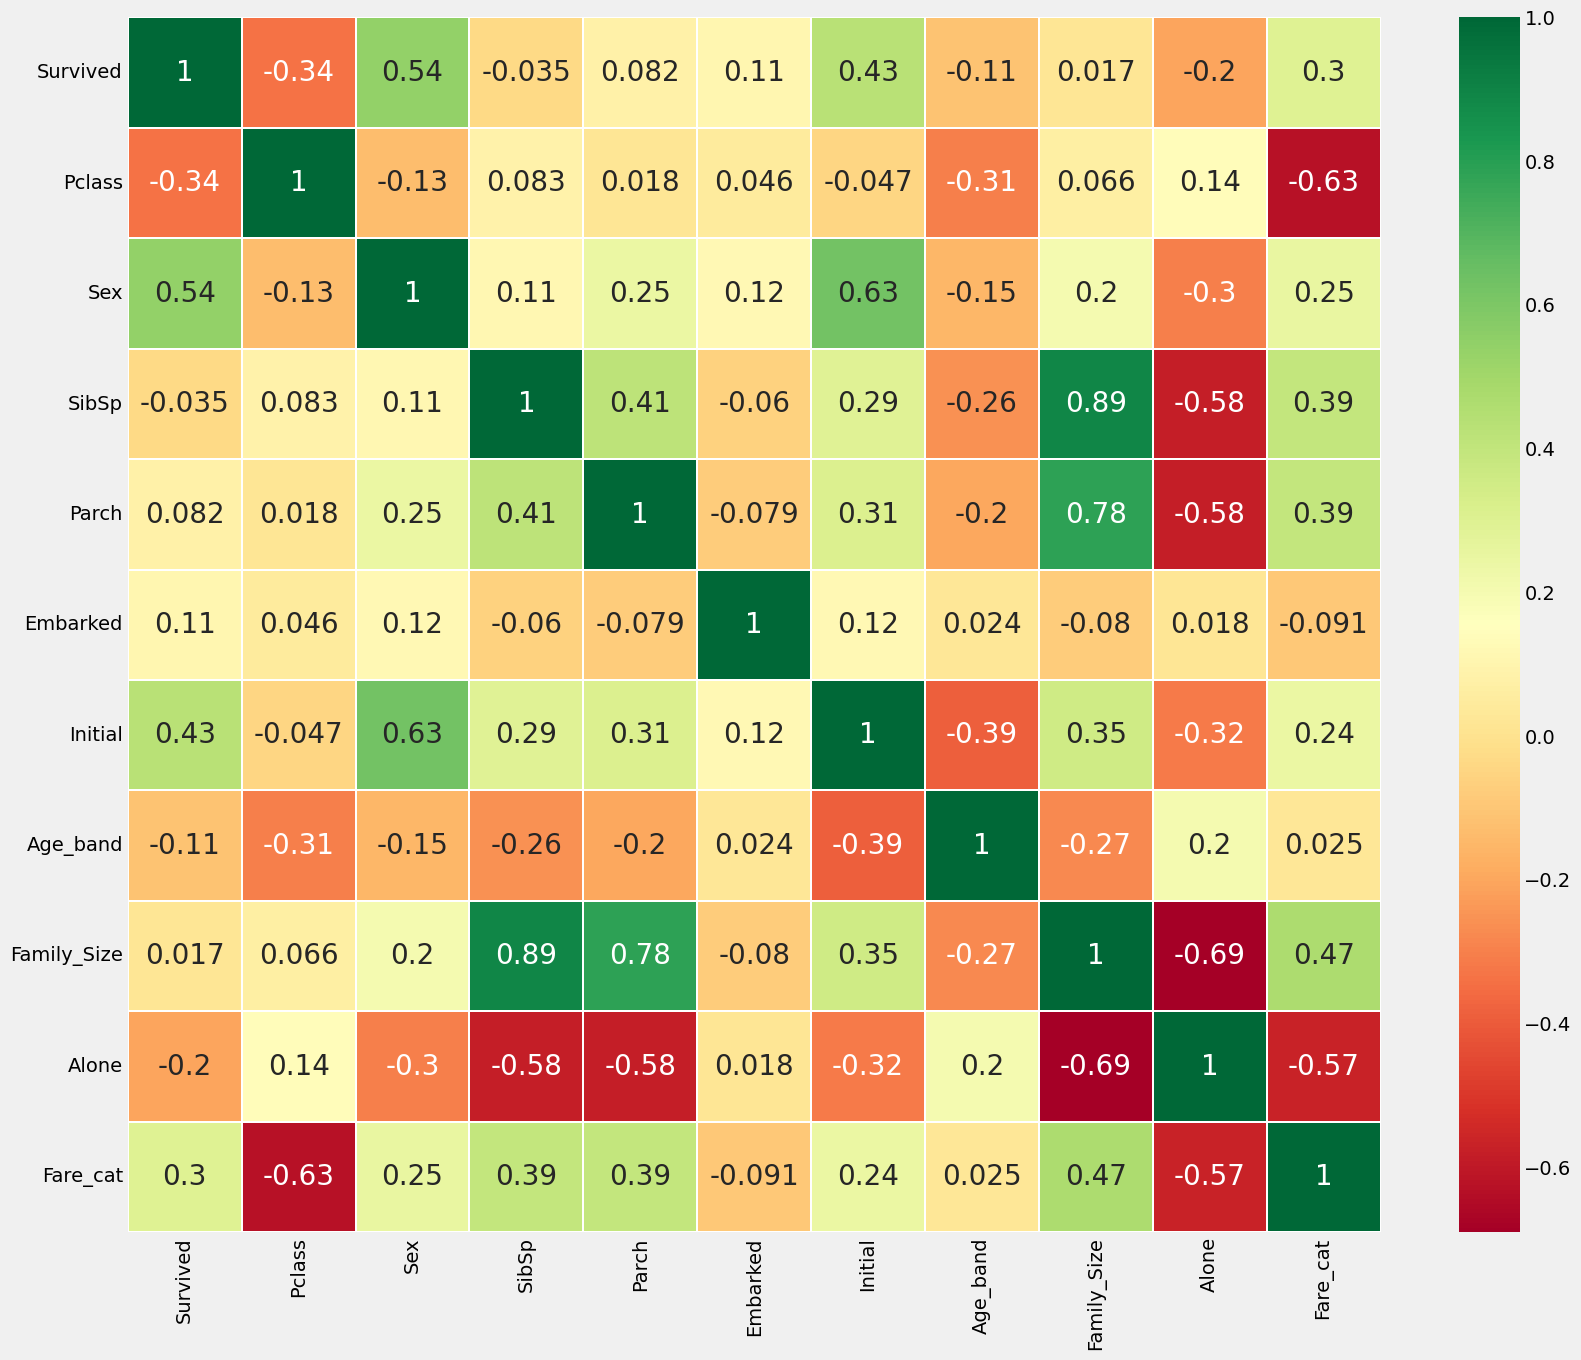

In [59]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

1. Logistic Regression

2. Support Vector Machines(Linear and radia)

3. Random Foest

4. K-Nearest Neigbours

5. Naie Bayes

6. Decsion Tree

7. Logistic Regression

In [60]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [61]:
train, test=train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)


In [62]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)


In [63]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [65]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [66]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7947761194029851


### K-Nearest Neighbours(KNN)

In [67]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


- n_neighbours 속성 값을 변경하면 KNN 모델의 정확도가 변경됨, 기본값 5

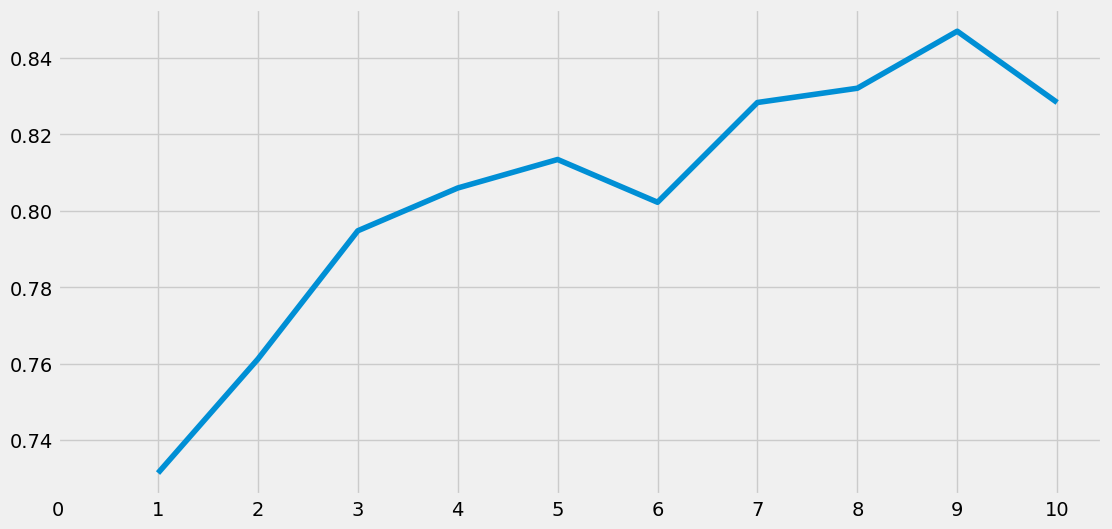

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [68]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a = pd.concat([a, pd.Series(metrics.accuracy_score(prediction, test_Y))], ignore_index=True)
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [69]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forest

In [70]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


- 새로운 테스트에 대해서 정확도를 보장할 수 없음
- Classifier가 스스로를 훈련하는 데 사용할 모든 instances을 결정할 수 없기 때문
- 학습/테스트 데이터가 변경되면 정확도도 변경됨 -> 이를 model vaiance라고 함
-이러한 문제를 해결하기 위해 Cross Validation 사

## Cross Validation

1. KFold 교차 검증은 먼저 데이터셋을 k개의 부분집합으로 나눔
2. 데이터셋을 5개로 나눈다고 가정하면 1개의 부분을 테스트용으로 남겨두고 4개의 부분에 대해 알고리즘에 학습
3. 반복마다 테스트 부분을 변경하고 나머지 부분에 대해 알고리즘 학습, 정확도와 오차를 평균화하여 알고리즘의 평균 정확도를 구함
4. 알고리즘은 일부 학습 데이터셋에서는 과소적합될 수 있고 과대적합될 수도 있

In [71]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.804744,0.045956
Naive Bayes,0.795843,0.054861
Random Forest,0.809238,0.046965


<Axes: >

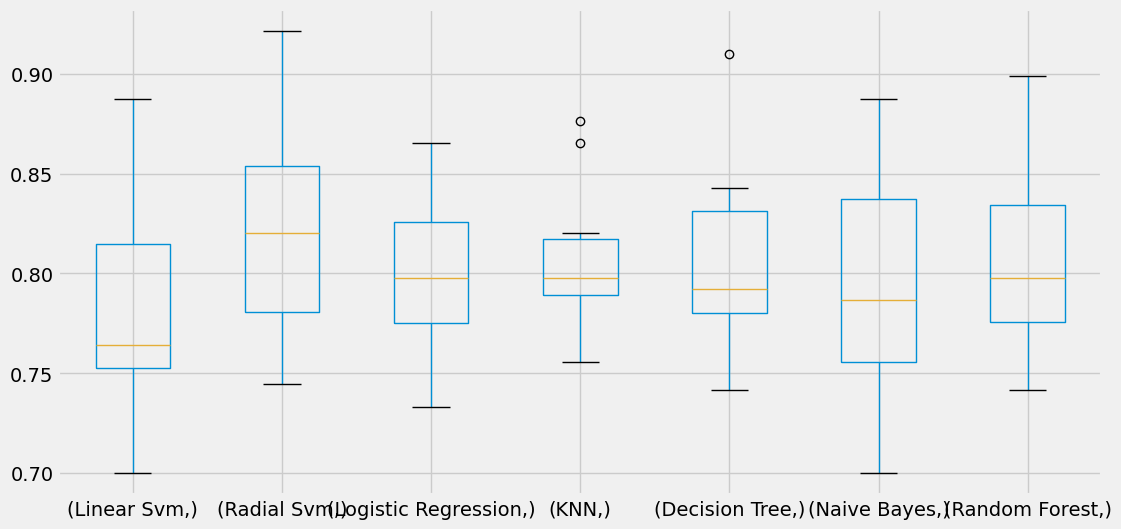

In [72]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

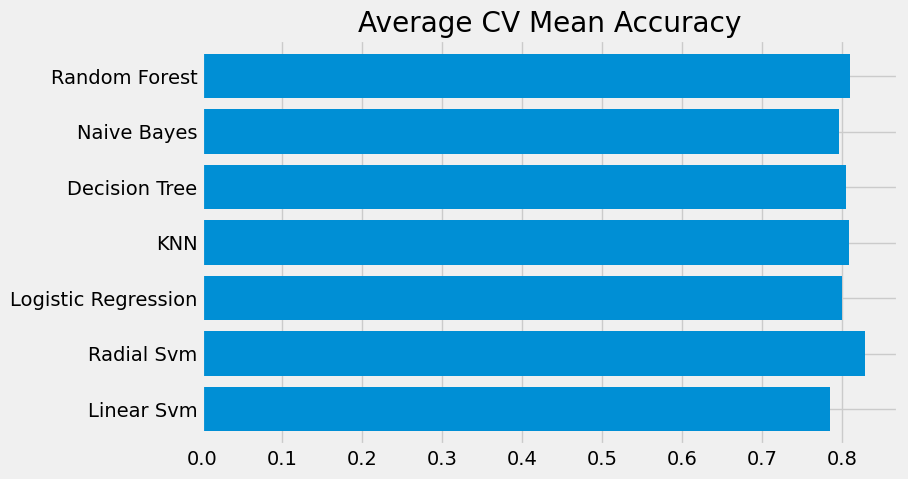

In [73]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 불균형으로 분류 정확도의 오차 생길 수 있음
- confusion matrix를 통해 모델이 어디에서 잘못되었는지 알 수 있음


## Confusion Matrix


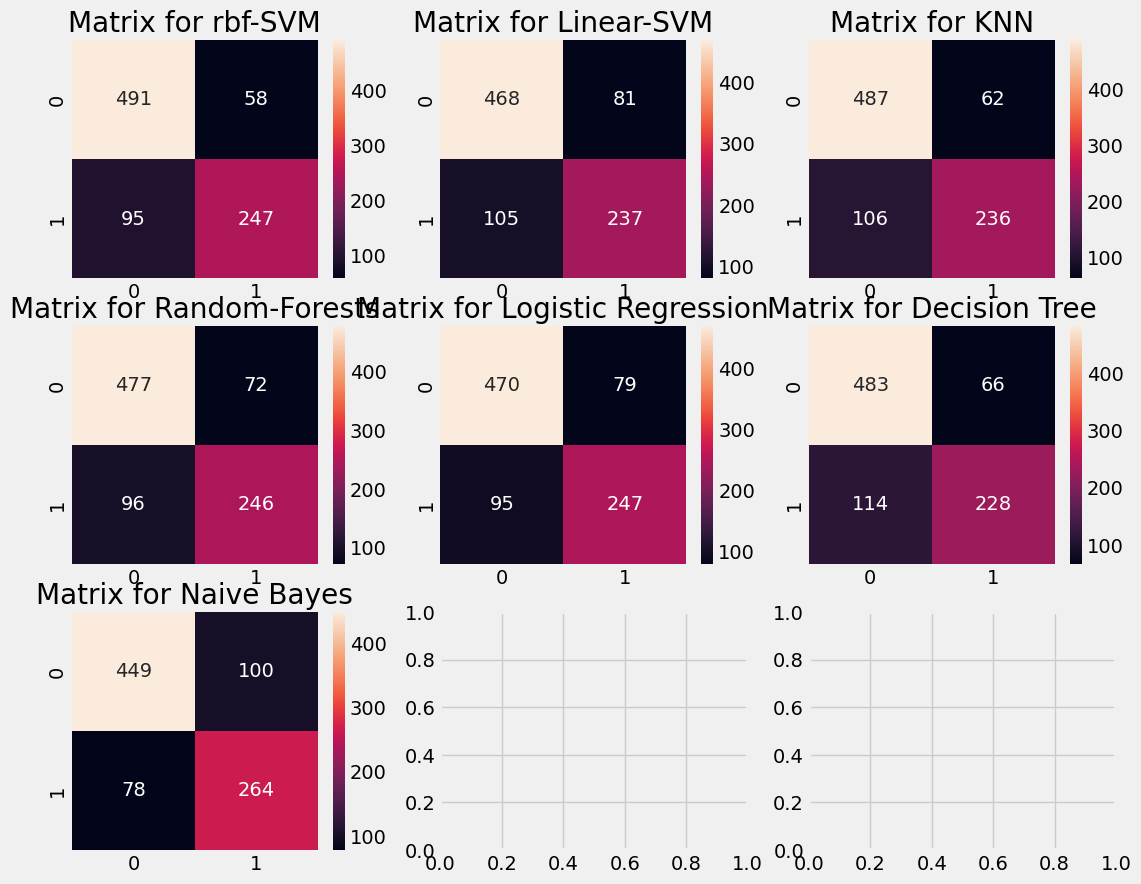

In [74]:
f, ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

- 왼쪽 대각선은 각 클래스에 대해 올바른 예측 횟수를 나타내고 오른쪽 대각선은 잘못된 예측 횟수를 나타

## Hyper-Parameters Tuning

- SVM과 RandomForests, 두 가지 가장 우수한 Classsifier 하이퍼파라미터를 튜닝

---

### SVM

In [75]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forest

In [76]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


- The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1. For RandomForest, score is abt 81.8% with n_estimators=900.

## Ensembling

### Voting Classifier

In [79]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                             ('LR',LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=0)),
                                             ('NB',GaussianNB()),
                                             ('svm',svm.SVC(kernel='linear',probability=True))],
                                 voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv=10,scoring="accuracy")
print('The cross validated score is',cross.mean())


The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8249188514357053


### Bagging

In [81]:
!pip install --upgrade scikit-learn

In [84]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Bagged Decision tree

In [86]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting - AdaBost(Adaptive Boost)

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


### Stochastic Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [89]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


### Hyper-Parameter Tuning for AdaBoost

In [90]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


- The maximum accuracy we can get with AdaBoost is 83.16% with n_estimators=200 and learning_rate=0.05

### Confusion Matrix for the Best Model

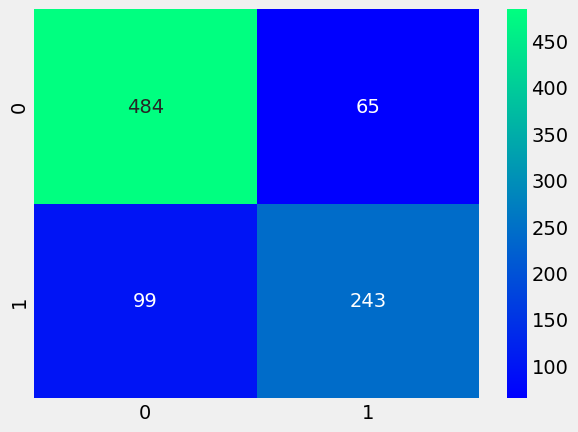

In [91]:
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance


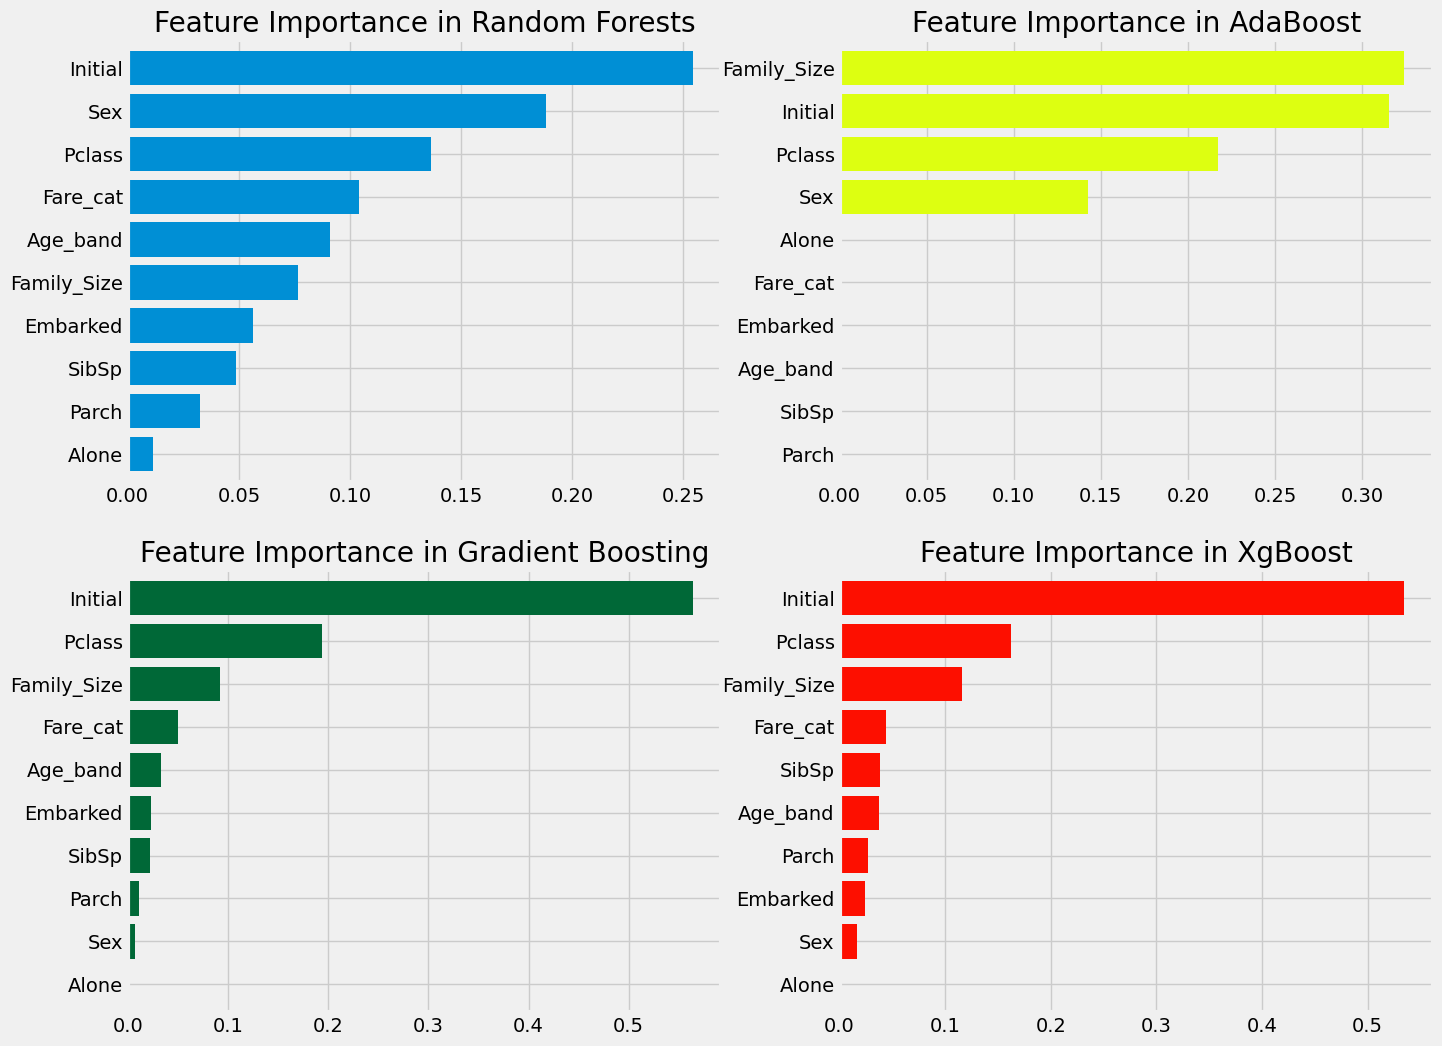

In [92]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

1. 공통적으로 중요한 특징 중 일부는 Initial, Fare_cat, Pclass, Family_Size
2. Sex 중요성을 부여하지 않는 것으로 보이는데, 이는 앞서 Sex와 Pclass를 합친 것이 차별화 요인을 제공한다는 것을 보았기 때문, 랜덤 포래스트에서만 중요, Sex와 Initial 간의 양의 상관관계는 이미 확인되었으므로 둘 다 성별을 나타냄
3.  Pclass와 Fare_cat은 승객의 상태를 나타내고, Alone, Parch, SibSp와 함께 Family_Size를 나타냄